# **Coffee Sales Analysis**

![coffee](coffeesales.png)

## 🔎 Exploratory Data Analysis (EDA)

### Data Preparation

🔽 Import *Python library* yang akan digunakan

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter('ignore')

🔽 Melakukan input data yang akan dianalisa

In [115]:
coffee_sales = pd.read_csv('data_input/coffeeshopsales.csv', sep=';')

🔽 Menampilkan 5 baris teratas pada *DataFrame*

In [116]:
coffee_sales.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,30/06/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/06/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/06/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/06/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,30/06/2023,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


### Data Wrangling

🔽 Menampilkan ringkasan informasi pada *DataFrame*

In [117]:
coffee_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


🔽 Menampilkan nilai *unique* pada *DataFrame* di setiap kolom

In [118]:
# Membuat DataFrame baru dengan nilai unik pada setiap kolom
columnvalue = coffee_sales.nunique().reset_index()

# Mengganti nama baru pada kolom
columnvalue.rename(columns= {'index' : 'Nama_Kolom', 0 : 'Unique_Values'}, inplace= True)

columnvalue

,Nama_Kolom,Unique_Values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


🔽 Memeriksa *Missing Values* pada *DataFrame*

In [119]:
coffee_sales.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

🔽 Memeriksa *Duplicates Data* pada *DataFrame*

In [120]:
coffee_sales.duplicated().sum()

np.int64(0)

🔽 Menampilkan ringkasan Statistika Deskriptif pada *DataFrame*

In [121]:
coffee_sales.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [122]:
coffee_sales.describe(include='object')

,transaction_date,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116,149116
unique,181,25762,3,9,29,80
top,19/06/2023,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,1343,41,50735,58416,17183,3076


In [123]:
coffee_sales.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


🔍 Hasil Pemeriksaan *DataFrame* :
1.  Tidak terdapat *Missing Value* pada *DataFrame*.
2.  Tidak terdapat *Duplicates Data* pada *DataFrame*.
3.  Kolom `store_id`, `product_id`, & `transaction_id` akan dihapus karena data pada kolom tersebut tidak gunakan dalam proses analisa data.
4.  Data pada kolom `store_location`, `product_category`, & `product_type` akan kita ubah menjadi tipe data `category`.
5.  Data pada kolom `transaction_date` akan kita ubah menjadi tipe data `datetime64[ns]`.

🔽 Menghapus kolom yang tidak digunakan

In [124]:
coffee_sales.drop(columns= ['transaction_id', 'store_id', 'product_id'], inplace= True)

🔽 Mengubah tipe data pada *DataFrame*

In [125]:
# Mengubah kolom transaction_date dari tipe data object ke datetime64[ns]
transaction_date_mix = pd.Series(coffee_sales['transaction_date'])
transaction_date_mix

0         01/01/2023
1         01/01/2023
2         01/01/2023
3         01/01/2023
4         01/01/2023
             ...    
149111    30/06/2023
149112    30/06/2023
149113    30/06/2023
149114    30/06/2023
149115    30/06/2023
Name: transaction_date, Length: 149116, dtype: object

In [126]:
coffee_sales['transaction_date'] = pd.to_datetime(transaction_date_mix, dayfirst=True, format='mixed')

In [127]:
coffee_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_date  149116 non-null  datetime64[ns]
 1   transaction_time  149116 non-null  object        
 2   transaction_qty   149116 non-null  int64         
 3   store_location    149116 non-null  object        
 4   unit_price        149116 non-null  float64       
 5   product_category  149116 non-null  object        
 6   product_type      149116 non-null  object        
 7   product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 9.1+ MB


In [128]:
coffee_sales.tail()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail
149111,2023-06-30,20:18:41,2,Hell's Kitchen,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,2023-06-30,20:25:10,2,Hell's Kitchen,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,2023-06-30,20:31:34,1,Hell's Kitchen,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,2023-06-30,20:57:19,1,Hell's Kitchen,3.75,Coffee,Barista Espresso,Cappuccino
149115,2023-06-30,20:57:19,2,Hell's Kitchen,0.80,Flavours,Regular syrup,Hazelnut syrup


## 📗 Univariat Analysis & Visualization

Analisis Univariat merupakan analisis yang berfokus pada satu variabel dalam satu waktu. Tujuan dari Analisis Bivariat untuk mendeskripsikan karakteristik dan pola dari variabel tersebut.

### 📊 Jumlah Transaksi per Bulan

In [129]:
# Menambahkan kolom tahun
coffee_sales['year'] = coffee_sales['transaction_date'].dt.year

# Menambahkan kolom bulan
coffee_sales['month'] = coffee_sales['transaction_date'].dt.month_name()

# Menambahkan kolom hari
coffee_sales['day'] = coffee_sales['transaction_date'].dt.day_name()

In [130]:
coffee_sales.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day
0,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday
1,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday
2,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday
3,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday
4,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday


In [131]:
coffee_sales['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [132]:
transactions_per_months = coffee_sales['month'].value_counts()
transactions_per_months

month
June        35352
May         33527
April       25335
March       21229
January     17314
February    16359
Name: count, dtype: int64

In [133]:
iplot(px.bar(x=transactions_per_months.index, y=transactions_per_months.values,
             labels={'x': 'Bulan', 'y': 'Jumlah Transaksi'},
             title='Jumlah Transaksi per Bulan', text_auto= True))

### 📊 Jumlah Transaksi per Hari

In [134]:
coffee_sales['day'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [135]:
transactions_per_day = coffee_sales['day'].value_counts()
transactions_per_day

day
Friday       21701
Thursday     21654
Monday       21643
Wednesday    21310
Tuesday      21202
Sunday       21096
Saturday     20510
Name: count, dtype: int64

In [136]:
iplot(px.bar(x=transactions_per_day.index, y=transactions_per_day.values,
             labels={'x' : 'Hari', 'y' : 'Jumlah Transaksi'},
             title='Transaksi per Hari', text_auto= True))

### 📊 Distribusi Waktu Transaksi

In [137]:
coffee_sales['transaction_time'] = pd.to_datetime(coffee_sales['transaction_time'], format='mixed')

In [138]:
coffee_sales.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day
0,2023-01-01,2025-01-18 07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday
1,2023-01-01,2025-01-18 07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday
2,2023-01-01,2025-01-18 07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday
3,2023-01-01,2025-01-18 07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday
4,2023-01-01,2025-01-18 07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday


In [139]:
coffee_sales['transaction_time'] = coffee_sales['transaction_time'].dt.hour

In [140]:
coffee_sales.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day
0,2023-01-01,7,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday
1,2023-01-01,7,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday
2,2023-01-01,7,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday
3,2023-01-01,7,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday
4,2023-01-01,7,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday


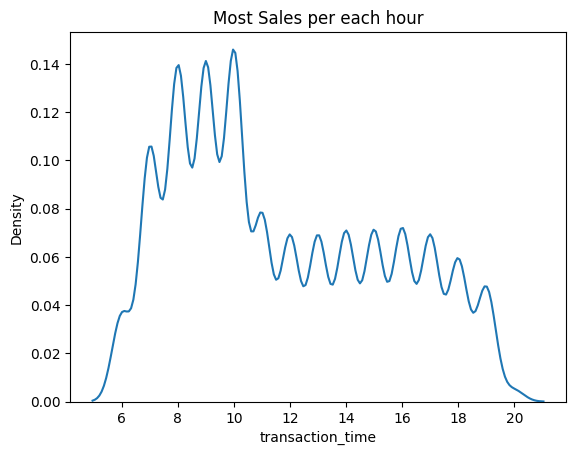

In [141]:
sns.kdeplot(coffee_sales["transaction_time"])
plt.title('Most Sales per each hour')
plt.show()

📋 Penjualan tertinggi terjadi dalam rentang pukul 8 hingga 10 pagi.

### 📊 Jumlah Penjualan pada tiap Toko

In [142]:
coffee_sales['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [143]:
sales_per_store = coffee_sales['store_location'].value_counts()
sales_per_store

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

In [144]:
iplot(px.pie(names= sales_per_store.index, values= sales_per_store.values,
             title= 'Jumlah Penjualan setiap Toko'))

📋 Tingkat penjualan di ketiga toko tersebut serupa, dengan perbedaan paling signifikan terlihat di toko Hell's Kitchen.

🔽 Melakukan pengecekan nilai *outliers* pada kolom `unit_price`

<Axes: ylabel='unit_price'>

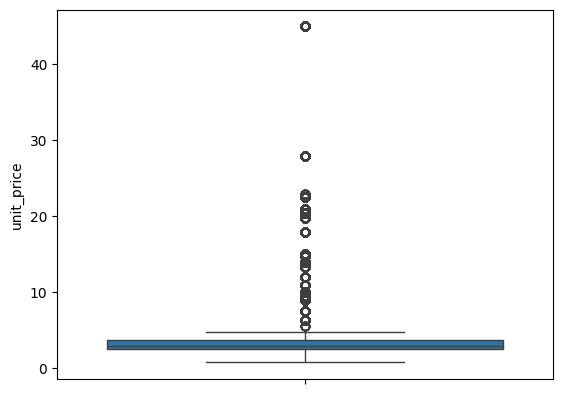

In [145]:
sns.boxplot(y= 'unit_price', data= coffee_sales)

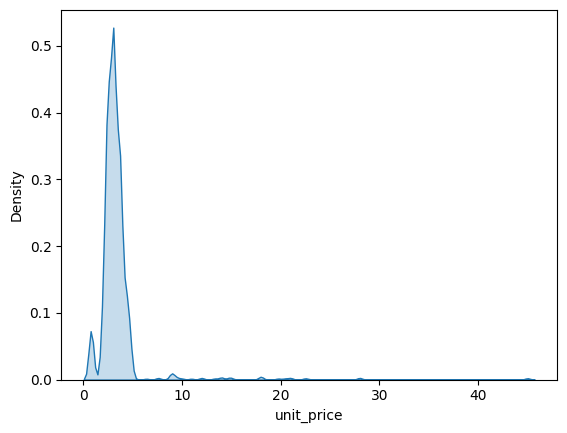

In [146]:
sns.kdeplot(x= coffee_sales['unit_price'], fill= True)
plt.show()

🔍 Results :
-   Sebagian besar kopi memiliki harga yang relatif rendah. Ini ditunjukkan oleh konsentrasi data di sisi kiri distribusi.
-   Ada beberapa jenis kopi dengan harga yang jauh lebih tinggi daripada rata-rata. Ini ditunjukkan oleh ekor distribusi yang memanjang ke kanan.
-   Distribusi harga kopi yang condong ke kanan adalah hal yang umum.  Hal ini menunjukkan adanya variasi harga yang signifikan, dengan sebagian besar kopi berada pada rentang harga yang lebih rendah dan beberapa kopi premium dengan harga yang jauh lebih tinggi.

### 📊 Jumlah Transaksi pada Kategori Produk

In [147]:
category_counts = coffee_sales['product_category'].value_counts()
category_counts

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

In [148]:
iplot(px.bar(x= category_counts.index, y= category_counts.values,
             labels= {'x' : 'Kategori Produk', 'y' : 'Produk'},
             title= 'Jumlah Transaksi per Kategori Produk', text_auto= True))

Kita dapat melihat bahwa :
1.  Ketiga toko tersebut menawarkan berbagai macam layanan.
2.  Kopi menjadi *best-selling product*.
3.  Teh juga menunjukan tingkat penjualan yang tinggi.
4.  Paket Coklat memiliki tingkat penjualan yang paling rendah.


### 📊 Jumlah Transaksi pada Tipe Produk

In [149]:
coffee_sales['product_type'].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [150]:
product_type_counts = coffee_sales['product_type'].value_counts()
product_type_counts

product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Pastry                    6912
Biscotti                  5711
Brewed Green tea          5671
Regular syrup             4979
Sugar free syrup          1811
Housewares                 526
Chai tea                   443
Organic Beans              415
Gourmet Beans              366
Premium Beans              336
Espresso Beans             319
Herbal tea                 305
Black tea                  303
Drinking Chocolate         266
Organic Chocolate          221
Clothing                   221
House blend Beans          183
Green tea                  159
Green beans                134
Name: count, dtype: int64

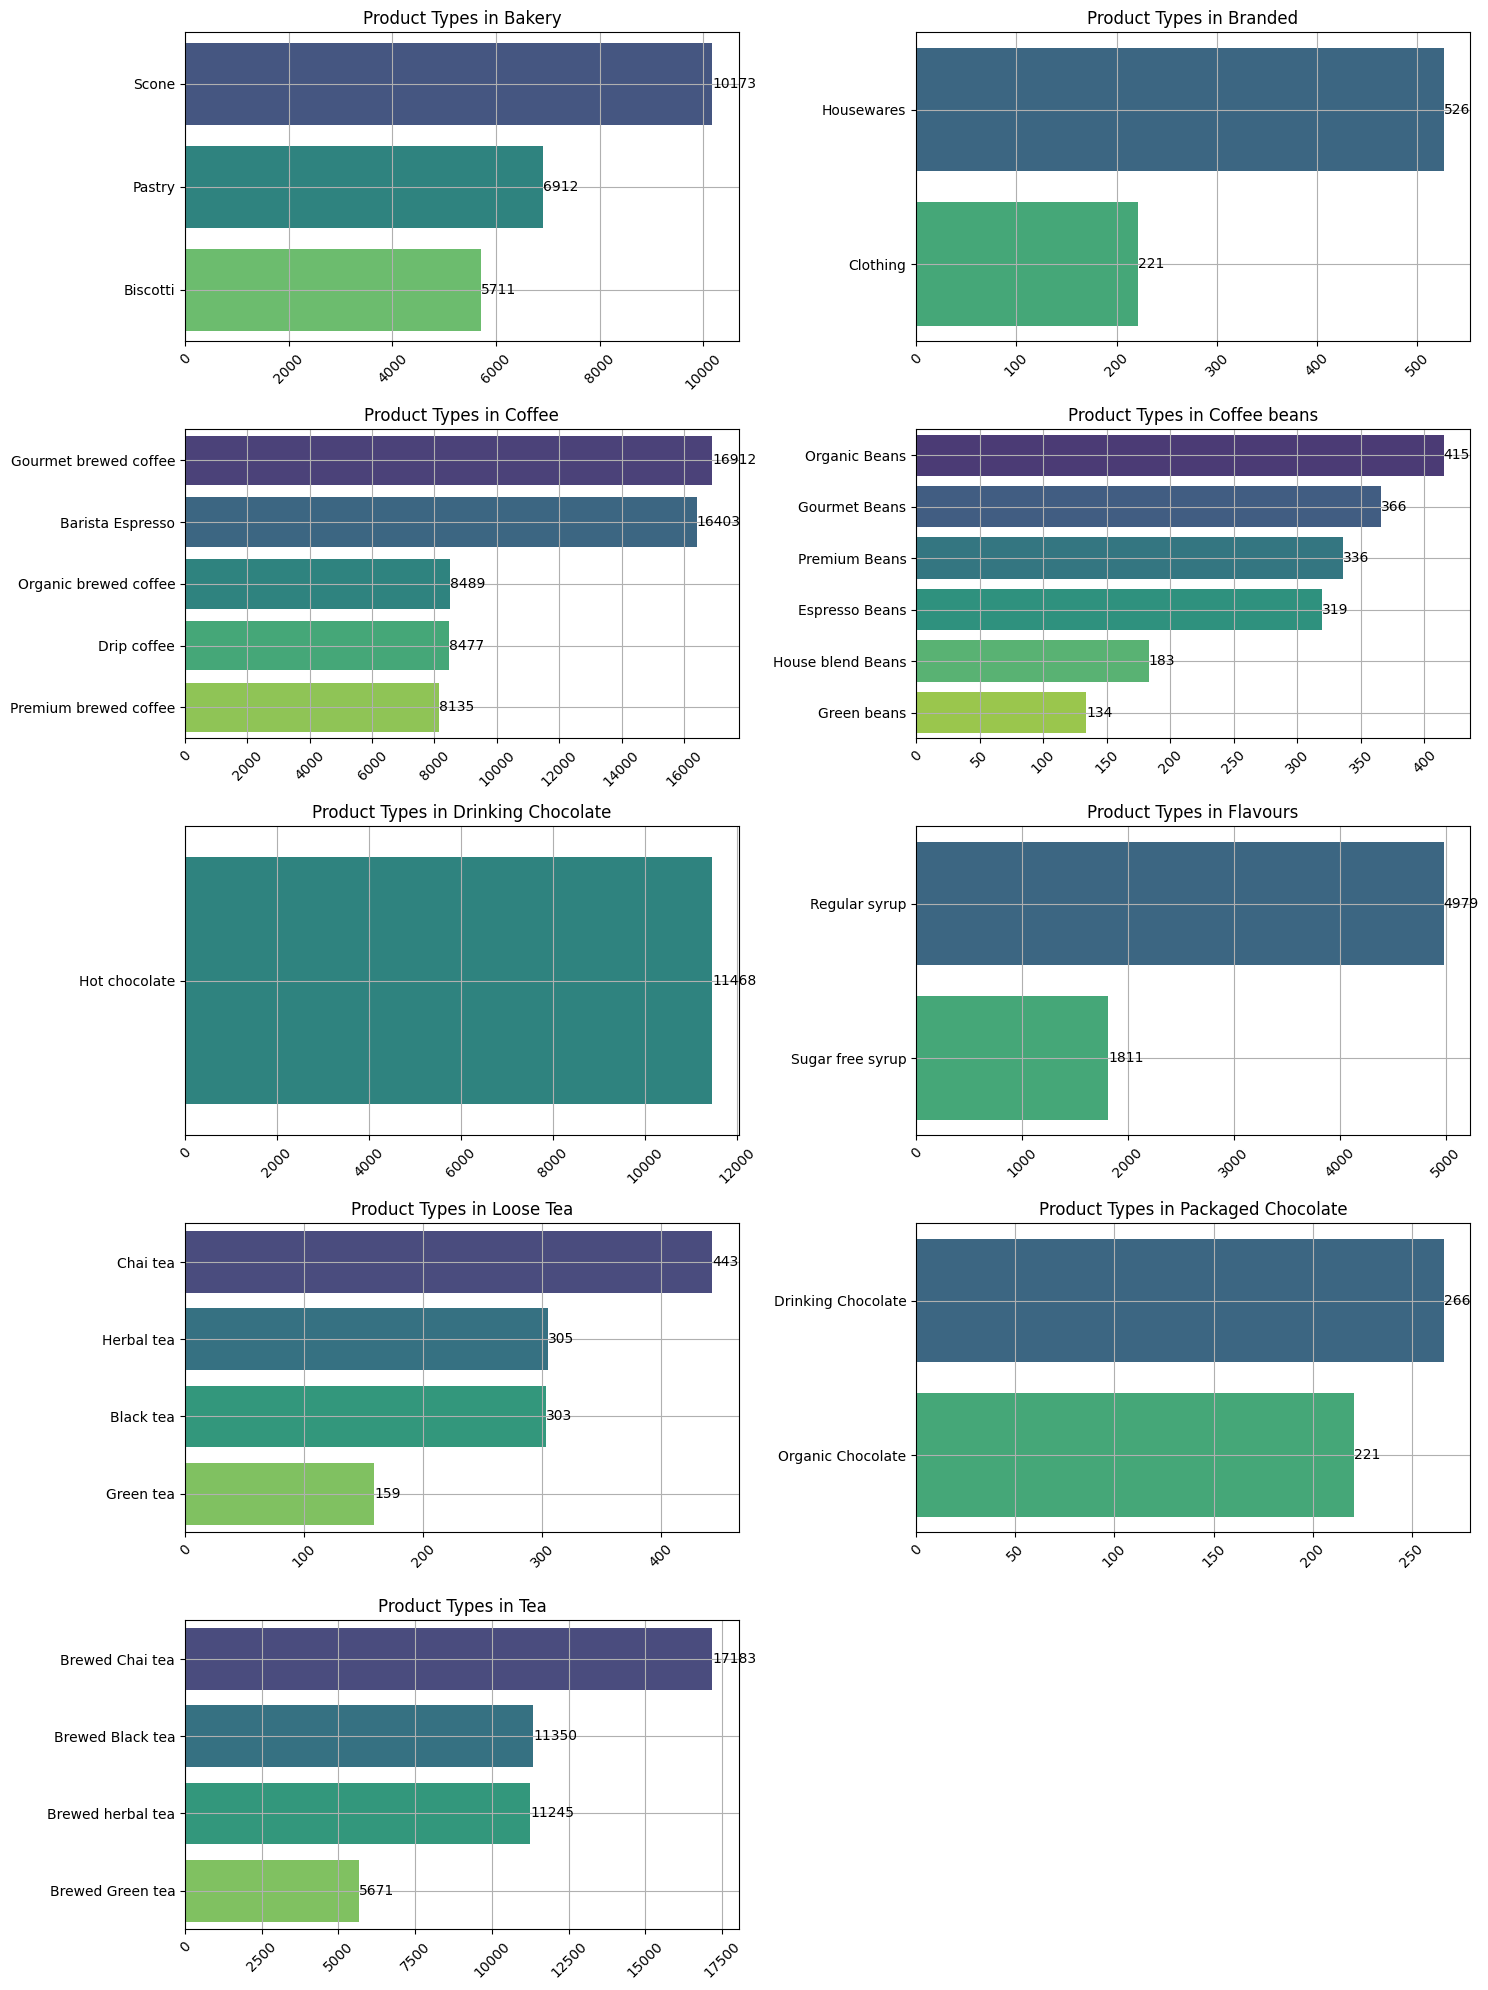

In [151]:
# Mengasumsikan 'counts' adalah DataFrame yang diperoleh dari operasi groupby
counts = coffee_sales.groupby(["product_category", "product_type"]).size().reset_index(name = "count")

# Menampilkan nilai unique category
categories = counts['product_category'].unique()

# Membuat subplots untuk setiap kategori dalam grid ukura 4x2
fig, axes = plt.subplots(5, 2, figsize = (15, 20))

# Meratakan sumbu agar iterasi lebih mudah
axes = axes.flatten()

for i, category in enumerate(categories):
    # Memfilter data dari setiap kategori
    subset = counts[counts['product_category'] == category]
    
    # Mengurutkan data berdasarkan kolom 'count' secara menurun
    subset = subset.sort_values('count', ascending = False)
    
    # Membuat bar plot untuk setiap kategori secara berurutan
    sns.barplot(x = 'count', y = 'product_type', data = subset, palette= 'viridis', ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)
    
    # Menambahkan label pada plot
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

# Sembunyikan subplot tambahan jika jumlah kategori lebih sedikit daripada jumlah subplot.
for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### 📝 Kesimpulan 

Kesimpulan dari Analisis Kolom :
-   Tahun: Penjualan secara eksklusif berasal dari tahun 2023.
-   Bulan: Sebagian besar penjualan terjadi dalam periode enam bulan.
-   Jam:  Sebagian besar penjualan terjadi antara pukul 8 hingga 10 pagi.
-   Jumlah Transaksi: Sebagian besar penjualan adalah satuan, diikuti oleh pembelian 2 lot.
-   Toko: Tingkat penjualan di ketiga toko serupa, dengan perbedaan paling signifikan teramati di toko Hell's Kitchen.
-   Harga Satuan: Distribusi harga condong ke kanan (positively skewed).  Ini menunjukkan bahwa sebagian besar kopi memiliki harga yang lebih rendah, sementara beberapa kopi memiliki harga yang lebih tinggi.

Kategori:
-   Terlihat jelas bahwa ketiga toko menawarkan berbagai macam layanan.
-   Kopi menjadi produk terlaris.
-   Teh juga menunjukkan tingkat penjualan yang tinggi.

Jenis Produk:
-   Dalam kategori `Bakery`, item yang paling banyak terjual adalah Scone.
-   Dalam kategori `Branded`, item terlaris adalah Housewares.
-   Dalam kategori `Coffee`, item terlaris adalah Gourmet Brewed coffee.
-   Dalam kategori `Coffee Beans`, item terlaris adalah Organic Beans.
-   Kategori `Drinking Chocolate` hanya menawarkan Hot chocolate.
-   Dalam kategori `Flavours`, item terlaris adalah Regular Syrup.
-   Dalam kategori `Loose Tea`, item terlaris adalah Chai tea.
-   Dalam kategori `Packaged Chocolate`, item terlaris adalah Drinking chocolate.
-   Dalam kategori `Tea`, item terlaris adalah Brewed Chai tea.

## 📘 Bivariat Analysis & Visualization

Analisis Bivariat merupakan analisis yang berfokus dalam menentukan hubungan atau korelasi antara dua variabel.

### 📊 Menampilkan `Total Revenue` setiap `store_location` 

In [152]:
coffee_sales['Total Revenue'] = coffee_sales['transaction_qty'] * coffee_sales['unit_price']

In [153]:
coffee_sales.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day,Total Revenue
0,2023-01-01,7,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,January,Sunday,6.0
1,2023-01-01,7,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,6.2
2,2023-01-01,7,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023,January,Sunday,9.0
3,2023-01-01,7,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023,January,Sunday,2.0
4,2023-01-01,7,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,January,Sunday,6.2


In [154]:
sum_transaction_qty = coffee_sales.groupby("store_location")["transaction_qty"].sum().reset_index()

# Create a Plotly line plot
iplot(px.line(sum_transaction_qty, x="store_location", y="transaction_qty", 
              title="Total Transaction Quantities per Store Location",
              labels={"store_location": "Store Location", "transaction_qty": "Total Transaction Quantity"}))

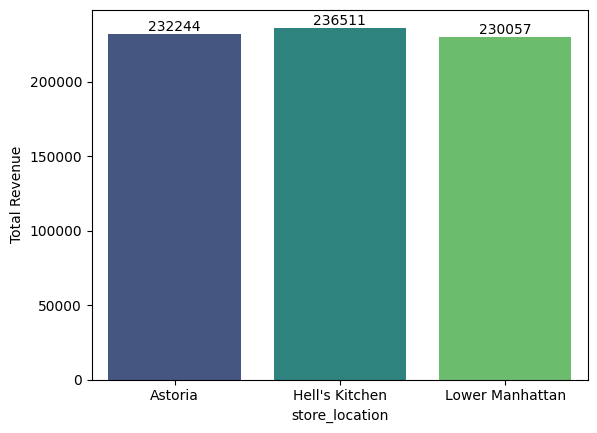

In [155]:
# Menghitung Total Pendapatan untuk setiap `store_location`
revenue = coffee_sales.groupby("store_location")["Total Revenue"].sum().reset_index()

# Membuat bar plot
ax = sns.barplot(x = "store_location", y = "Total Revenue", data = revenue, palette='viridis')

# AMemberikan label pada setiap plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

### 📊 Menampilkan jumlah `product_category` pada setiap `store_location`

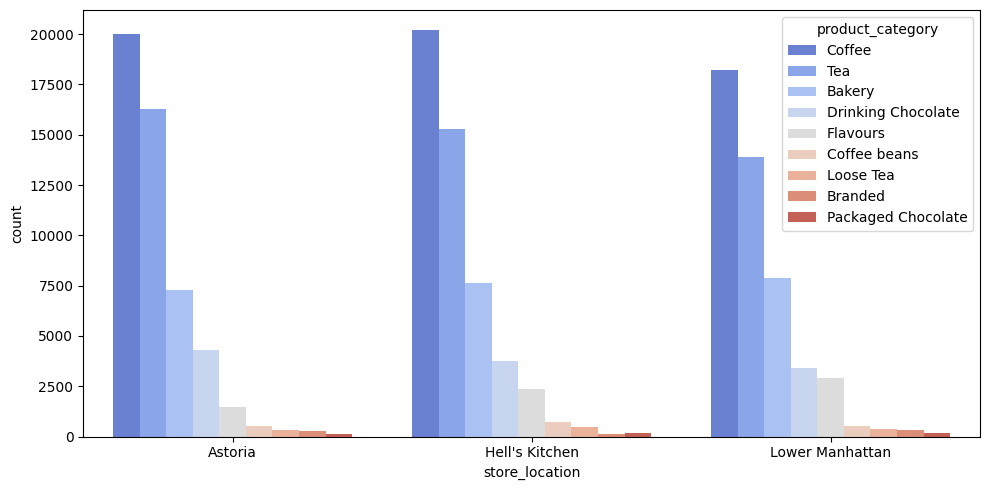

In [156]:
# Menghitung jumlah `product_category` pada setiap `store_location`
popular_products = coffee_sales.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(10, 5))

# Membuat bar plot 
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "coolwarm")

plt.tight_layout()
plt.show()

### 📊 Menampilkan jumlah `transaction_qty` pada setiap `store_location`

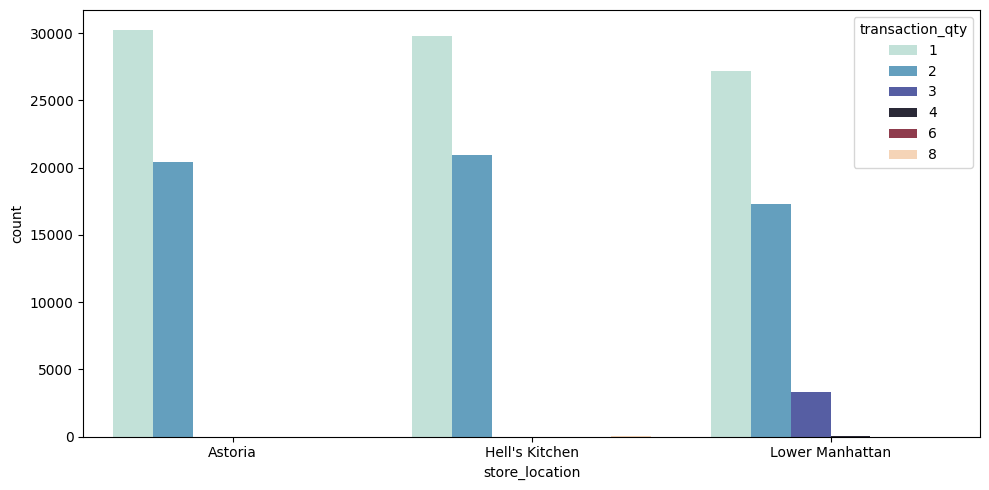

In [157]:
grouped_data = coffee_sales.groupby("store_location")["transaction_qty"].value_counts().reset_index(name = "count")

# set figure size
plt.figure(figsize=(10, 5))

# Create bar plot
sns.barplot(x = "store_location", y = "count", hue = "transaction_qty", data = grouped_data, palette= 'icefire')

plt.tight_layout()
plt.show()

### 📊 Menampilkan `Total Revenue` pada setiap `product_type`

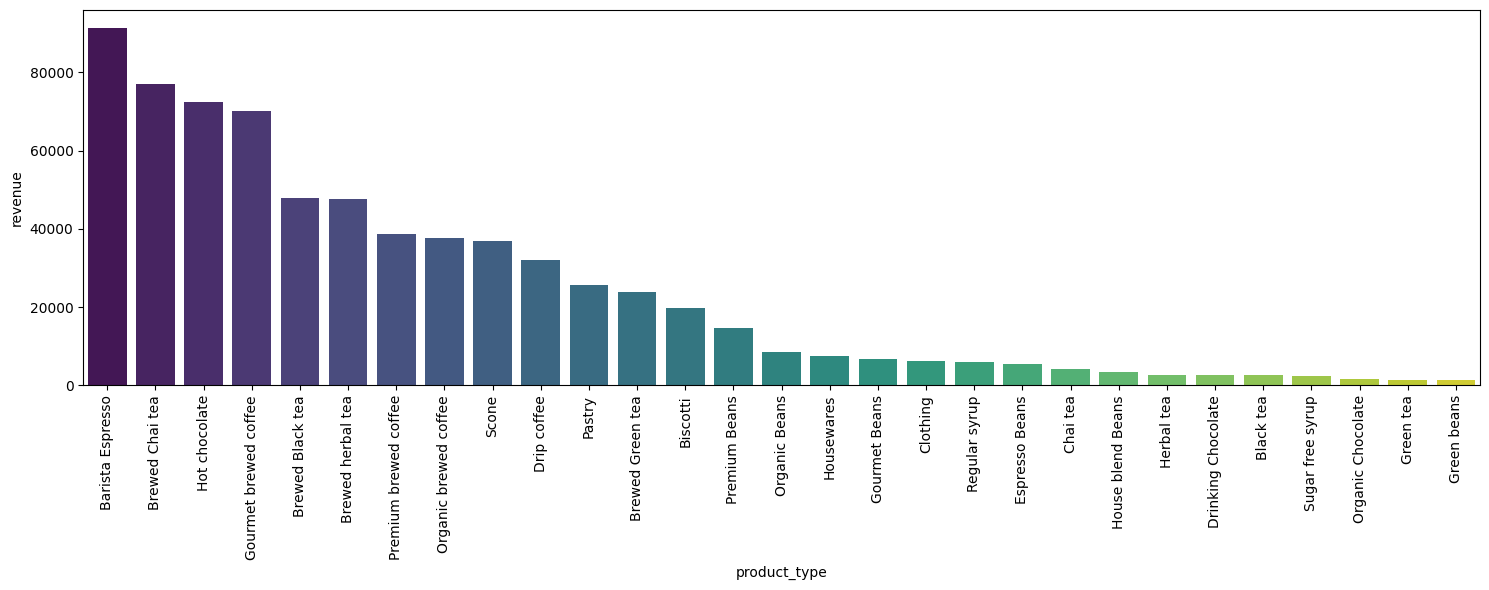

In [158]:
category_revenue = coffee_sales.groupby("product_type")["Total Revenue"].sum().reset_index(name = "revenue")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False)

# set figure size
plt.figure(figsize = (15,6))

# create bar plot
sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "viridis")

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

In [159]:
# Grouping by month and summing the revenue
monthly_revenue  = coffee_sales.groupby("month")["Total Revenue"].sum().reset_index().sort_values(by = "Total Revenue")

# Urutkan kolom `month` dalam DataFrame `monthly_revenue`
monthly_revenue = monthly_revenue.sort_values("month", key=lambda x: pd.to_datetime(x, format="%B"))

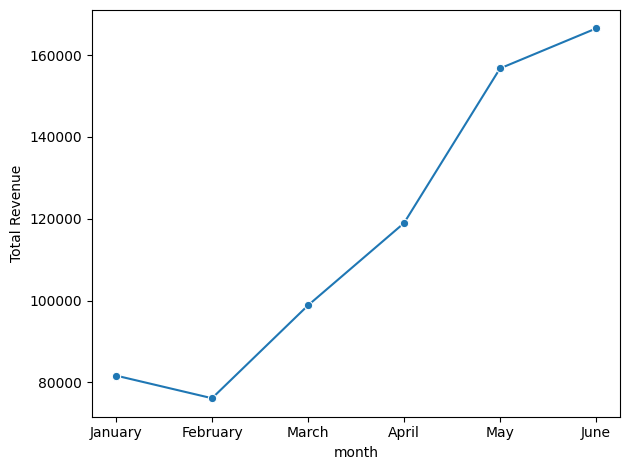

In [160]:
# Buat plot ulang dengan `monthly_revenue` yang telah diurutkan
sns.lineplot(x="month", y="Total Revenue", data=monthly_revenue, marker="o")
plt.tight_layout()
plt.show()

## 💡 Insight & Recommendations

-   Penjualan dalam kurung waktu 6 bulan
    -   Apakah ada pola musiman? Misalnya, apakah penjualan lebih tinggi di awal tahun atau akhir tahun? Informasi ini penting untuk strategi pemasaran dan inventory.

-   Jam 8-10 pagi
    -   Jam 8-10 pagi menunjukkan peak hour untuk penjualan kopi. Bisakah dioptimalkan dengan promo khusus di jam tersebut, atau menambah staff untuk mempercepat layanan?

-   Toko
    -   Hell's Kitchen memiliki memiliki perbedaan tingkat penjualan yang signifikan. Apa yang membuat toko ini berbeda? Apakah lokasinya, jenis pelanggan, atau strategi pemasarannya? Pelajari faktor pembeda ini dan terapkan di toko lain jika memungkinkan.

-   Harga
    -   Distribusi harga yang skewed menunjukkan adanya variasi harga yang signifikan. Apakah kopi dengan harga lebih tinggi memberikan profit margin yang lebih baik? Apakah perlu penyesuaian harga atau strategi upselling?

-   Produk
    -   Kopi, teh, dan bakery adalah produk terlaris. Bisakah dibuat bundle atau promo cross-selling untuk meningkatkan penjualan? Misalnya, paket kopi dan scone.

-   Kategori
    -   Beberapa kategori memiliki produk terlaris yang jelas (misalnya, Gourmet Brewed Coffee). Bagaimana dengan kategori lain? Apakah perlu product development atau strategi pemasaran yang berbeda?

-   Rekomendasi
    1.  Promosi: Promo flash sale di jam 8-10 pagi, bundle produk, loyalty program.

    2.  Operasional: Penambahan staff di jam sibuk, inventory management yang efisien.
    
    3.  Produk: Product development untuk kategori yang kurang populer, upselling kopi dengan harga premium.